<h1 align=center>Web Scraping and Data analysis Project</h1>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\NEERAJ\Downloads\My Projects\Etlhive Project\hockey.csv")

## *Checking the basic info of the Dataframe*

In [4]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [5]:
# Checking the shape of the Dataframe
df.shape

(582, 9)

In [6]:
# Checking the coulumn names
df.columns

Index(['Team Name', 'Year', 'Wins', 'Losses', 'OT Losses', 'Win %',
       'Goals For (GF)', 'Goals Against (GA)', '+ / -'],
      dtype='object')

In [7]:
# Chicking the information of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           582 non-null    object 
 1   Year                582 non-null    int64  
 2   Wins                582 non-null    int64  
 3   Losses              582 non-null    int64  
 4   OT Losses           358 non-null    float64
 5   Win %               582 non-null    float64
 6   Goals For (GF)      582 non-null    int64  
 7   Goals Against (GA)  582 non-null    int64  
 8   + / -               582 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 41.1+ KB


## 1.   *Cleaning the Dataframe and (Remove duplicates, Drop Missing Values column etc.)*

In [8]:
## First we check the null values in the dataset
df.isnull().sum()

Team Name               0
Year                    0
Wins                    0
Losses                  0
OT Losses             224
Win %                   0
Goals For (GF)          0
Goals Against (GA)      0
+ / -                   0
dtype: int64

#### *We can see the there are 224 missing value in OT Losses* 

In [9]:
## Here we see the missing percentage of the dataset
df.isnull().sum() *100 / len(df)

Team Name              0.000000
Year                   0.000000
Wins                   0.000000
Losses                 0.000000
OT Losses             38.487973
Win %                  0.000000
Goals For (GF)         0.000000
Goals Against (GA)     0.000000
+ / -                  0.000000
dtype: float64

In [10]:
# Checking the Dupluicated value in the dataframe
df.duplicated().sum()

0

#### *No duplicated values found in the Dataframe*

In [11]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


## 2.   *Each Team the Total Amount of Wins*

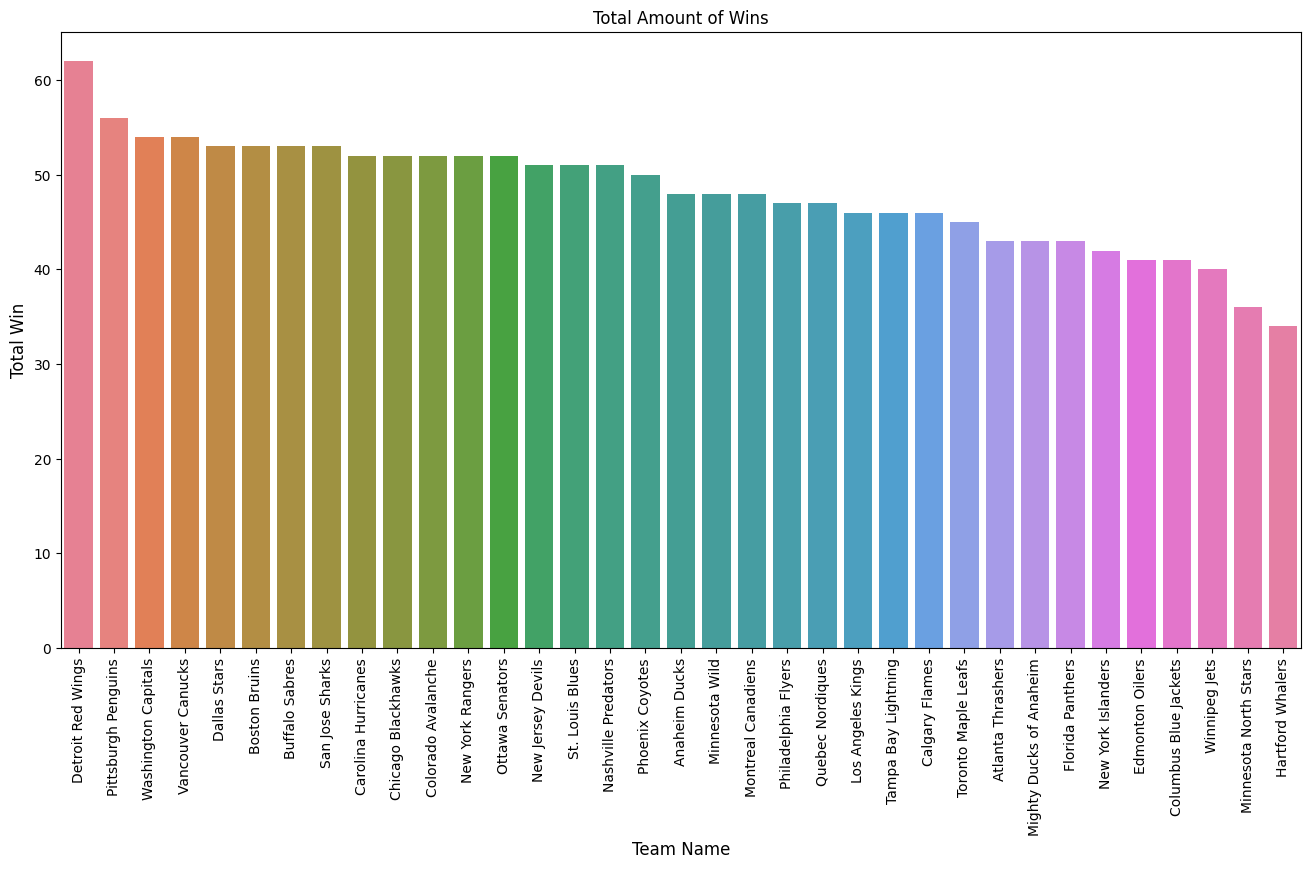

In [85]:
max = df.groupby(['Team Name'])['Wins'].max().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=max, x="Team Name", y='Wins',hue='Team Name')
plt.xticks(ticks=None,rotation=90)
plt.title('Total Amount of Wins')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Total Win",fontsize = 12)
plt.show()

## 2.   *For each Team show the total amount of losses*

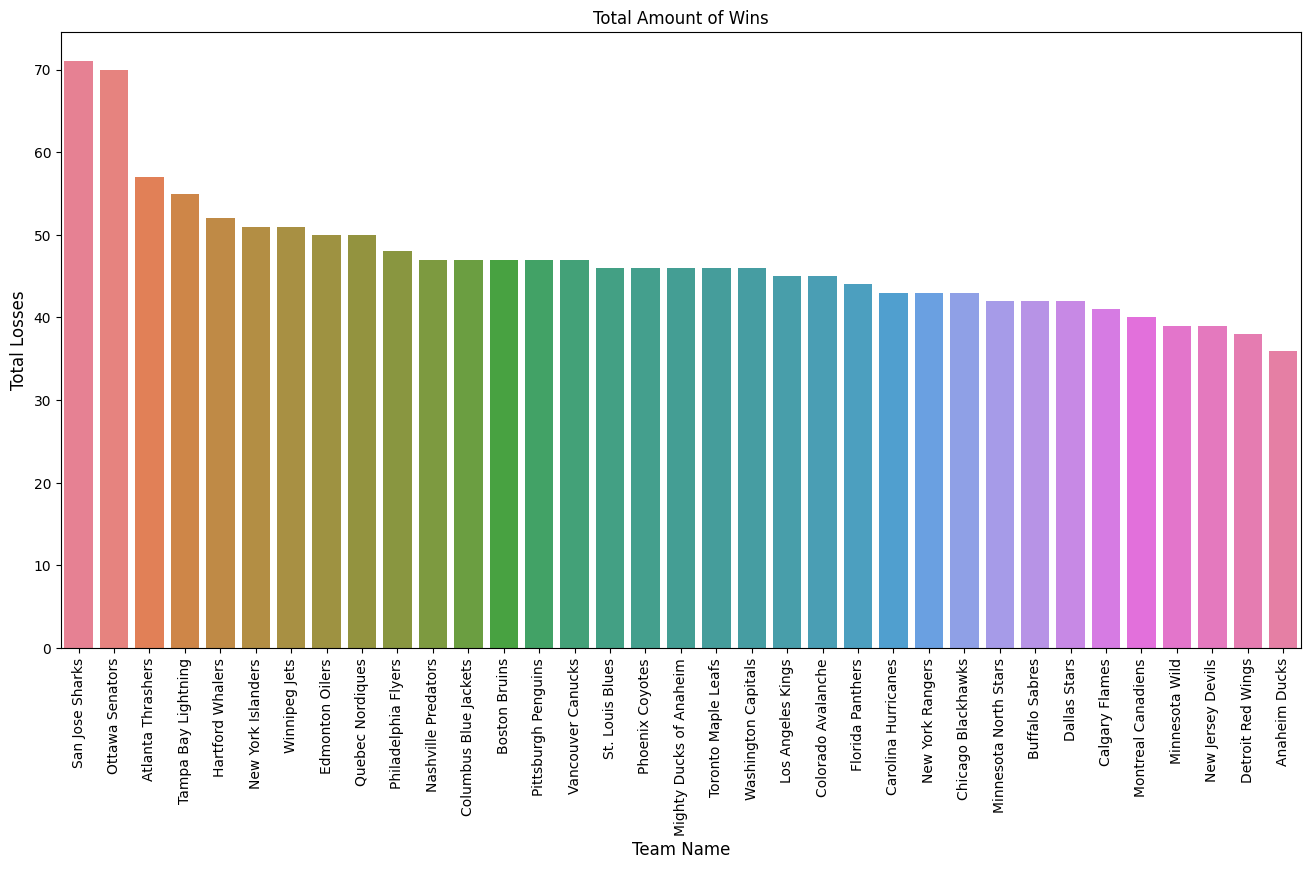

In [84]:
max = df.groupby(['Team Name'])['Losses'].max().sort_values(ascending=False).reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=max, x="Team Name", y='Losses',hue='Team Name')
plt.xticks(ticks=None,rotation=90)
plt.title('Total Amount of Wins')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Total Losses",fontsize = 12)
plt.show()

## 4.   *Find the net win percentage for Each Team by Following formula* 
`𝑆𝑢𝑚(𝑊𝑖𝑛𝑠) / 𝑆𝑢𝑚(𝑊𝑖𝑛𝑠) + 𝑆𝑢𝑚(𝐿𝑜𝑠𝑠𝑒𝑠)`

In [16]:
df['Total Games'] = df['Wins'] + df['Losses']

In [17]:
df['Net Win %'] = df['Wins']/df['Total Games']

In [18]:
team_win_percentage = df.groupby('Team Name')['Net Win %'].mean()

In [19]:
print(f"Net Win Percentage for Each Team :\n \n{team_win_percentage * 100}")

Net Win Percentage for Each Team :
 
Team Name
Anaheim Ducks              59.106953
Atlanta Thrashers          43.729247
Boston Bruins              57.011131
Buffalo Sabres             55.113579
Calgary Flames             52.992986
Carolina Hurricanes        52.545079
Chicago Blackhawks         52.962307
Colorado Avalanche         59.761443
Columbus Blue Jackets      43.665941
Dallas Stars               60.229127
Detroit Red Wings          67.393026
Edmonton Oilers            47.844758
Florida Panthers           48.416383
Hartford Whalers           41.271236
Los Angeles Kings          50.603323
Mighty Ducks of Anaheim    46.897596
Minnesota North Stars      44.266994
Minnesota Wild             52.469047
Montreal Canadiens         53.639164
Nashville Predators        53.996779
New Jersey Devils          61.520986
New York Islanders         44.126633
New York Rangers           53.582634
Ottawa Senators            50.931745
Philadelphia Flyers        58.551012
Phoenix Coyotes            5

## 5. *Top 5 Teams with Highest Win Percentage*

In [81]:
top_5_teams = df.groupby(['Team Name'])['Win %'].sum().sort_values(ascending=False)[0:5].reset_index()
top_5_teams

,Team Name,Win %
0,Detroit Red Wings,12.306
1,New Jersey Devils,11.221
2,Pittsburgh Penguins,10.475
3,Philadelphia Flyers,10.436
4,Boston Bruins,10.183


Text(0, 0.5, 'Win Percentage')

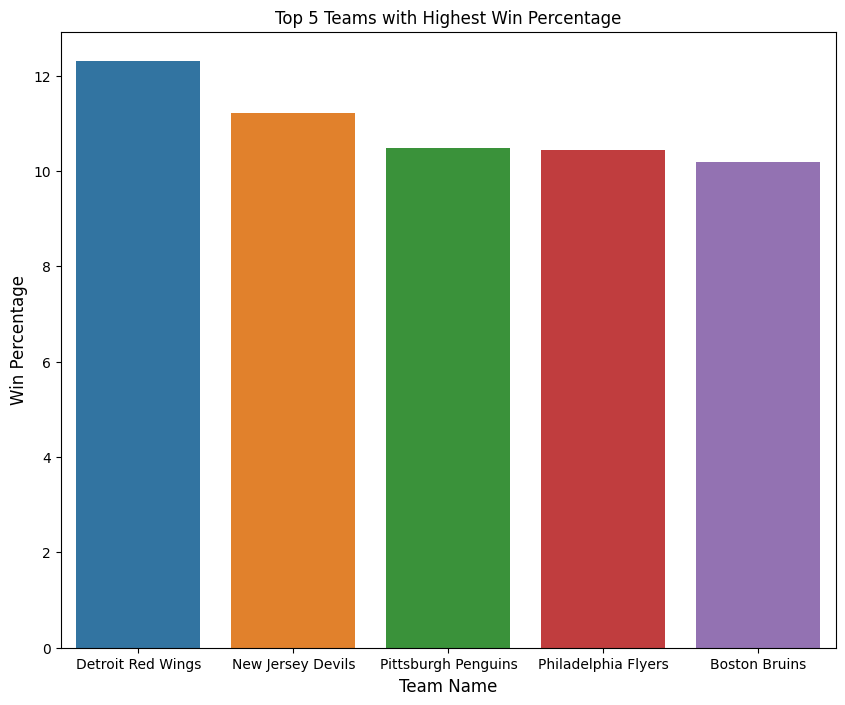

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(data=top_5_teams, x="Team Name", y='Win %',hue='Team Name')
plt.title('Top 5 Teams with Highest Win Percentage')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Win Percentage",fontsize = 12)

# Perfoming the Exploratry Data Analysis On the Dataset

### Checking the Descriptive statistics of Dataframe 

In [20]:
con = df.select_dtypes(include="number").columns
cat = df.select_dtypes(exclude='number').columns

In [21]:
con

Index(['Year', 'Wins', 'Losses', 'OT Losses', 'Win %', 'Goals For (GF)',
       'Goals Against (GA)', '+ / -', 'Total Games', 'Net Win %'],
      dtype='object')

In [22]:
df[con].describe()

,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -,Total Games,Net Win %
count,582.000000,582.000000,582.000000,358.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,7.460894,0.458519,234.063574,234.063574,0.000000,69.297251,0.532232
std,6.330674,8.926081,8.411439,3.610191,0.102237,40.548915,42.510718,45.277458,7.074910,0.112828
min,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000,36.000000,0.125000
25%,1996.000000,31.000000,27.000000,5.000000,0.390000,211.000000,207.000000,-27.000000,68.000000,0.460779
50%,2001.000000,38.000000,31.000000,7.000000,0.463000,231.000000,232.500000,4.000000,71.000000,0.545455
75%,2007.000000,43.000000,37.000000,10.000000,0.534000,254.000000,258.750000,31.000000,73.000000,0.613333
max,2011.000000,62.000000,71.000000,18.000000,0.756000,369.000000,414.000000,144.000000,82.000000,0.826667


In [23]:
cat

Index(['Team Name'], dtype='object')

In [24]:
df[cat].describe()

,Team Name
count,582
unique,35
top,Boston Bruins
freq,21


### Univariate Analysis 

<Axes: title={'center': 'Countplot for Team Name'}, xlabel='Team Name'>

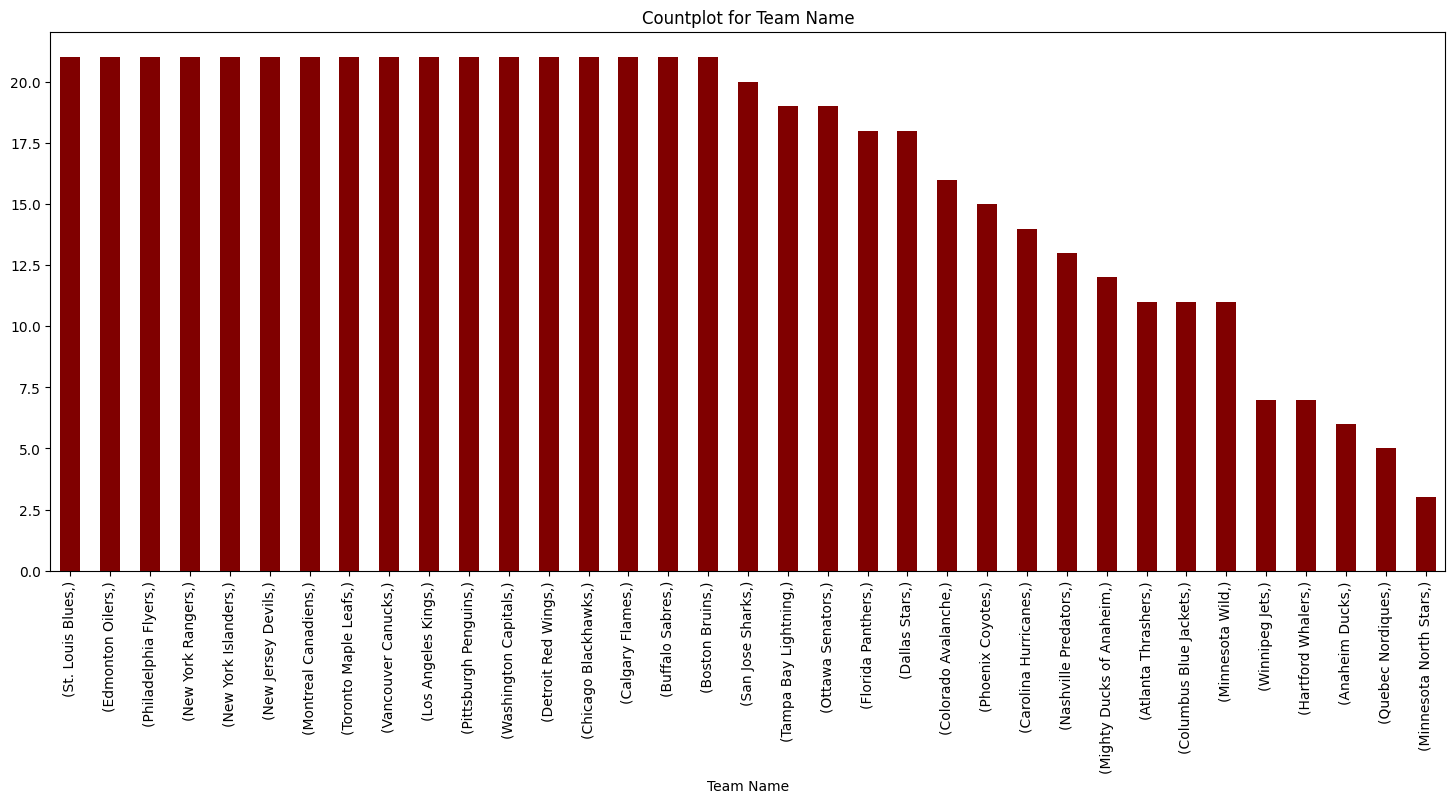

In [25]:
plt.figure(figsize =(18, 7))
df[cat].value_counts(ascending=False).plot(kind='bar',title=f'Countplot for Team Name',color ='maroon')

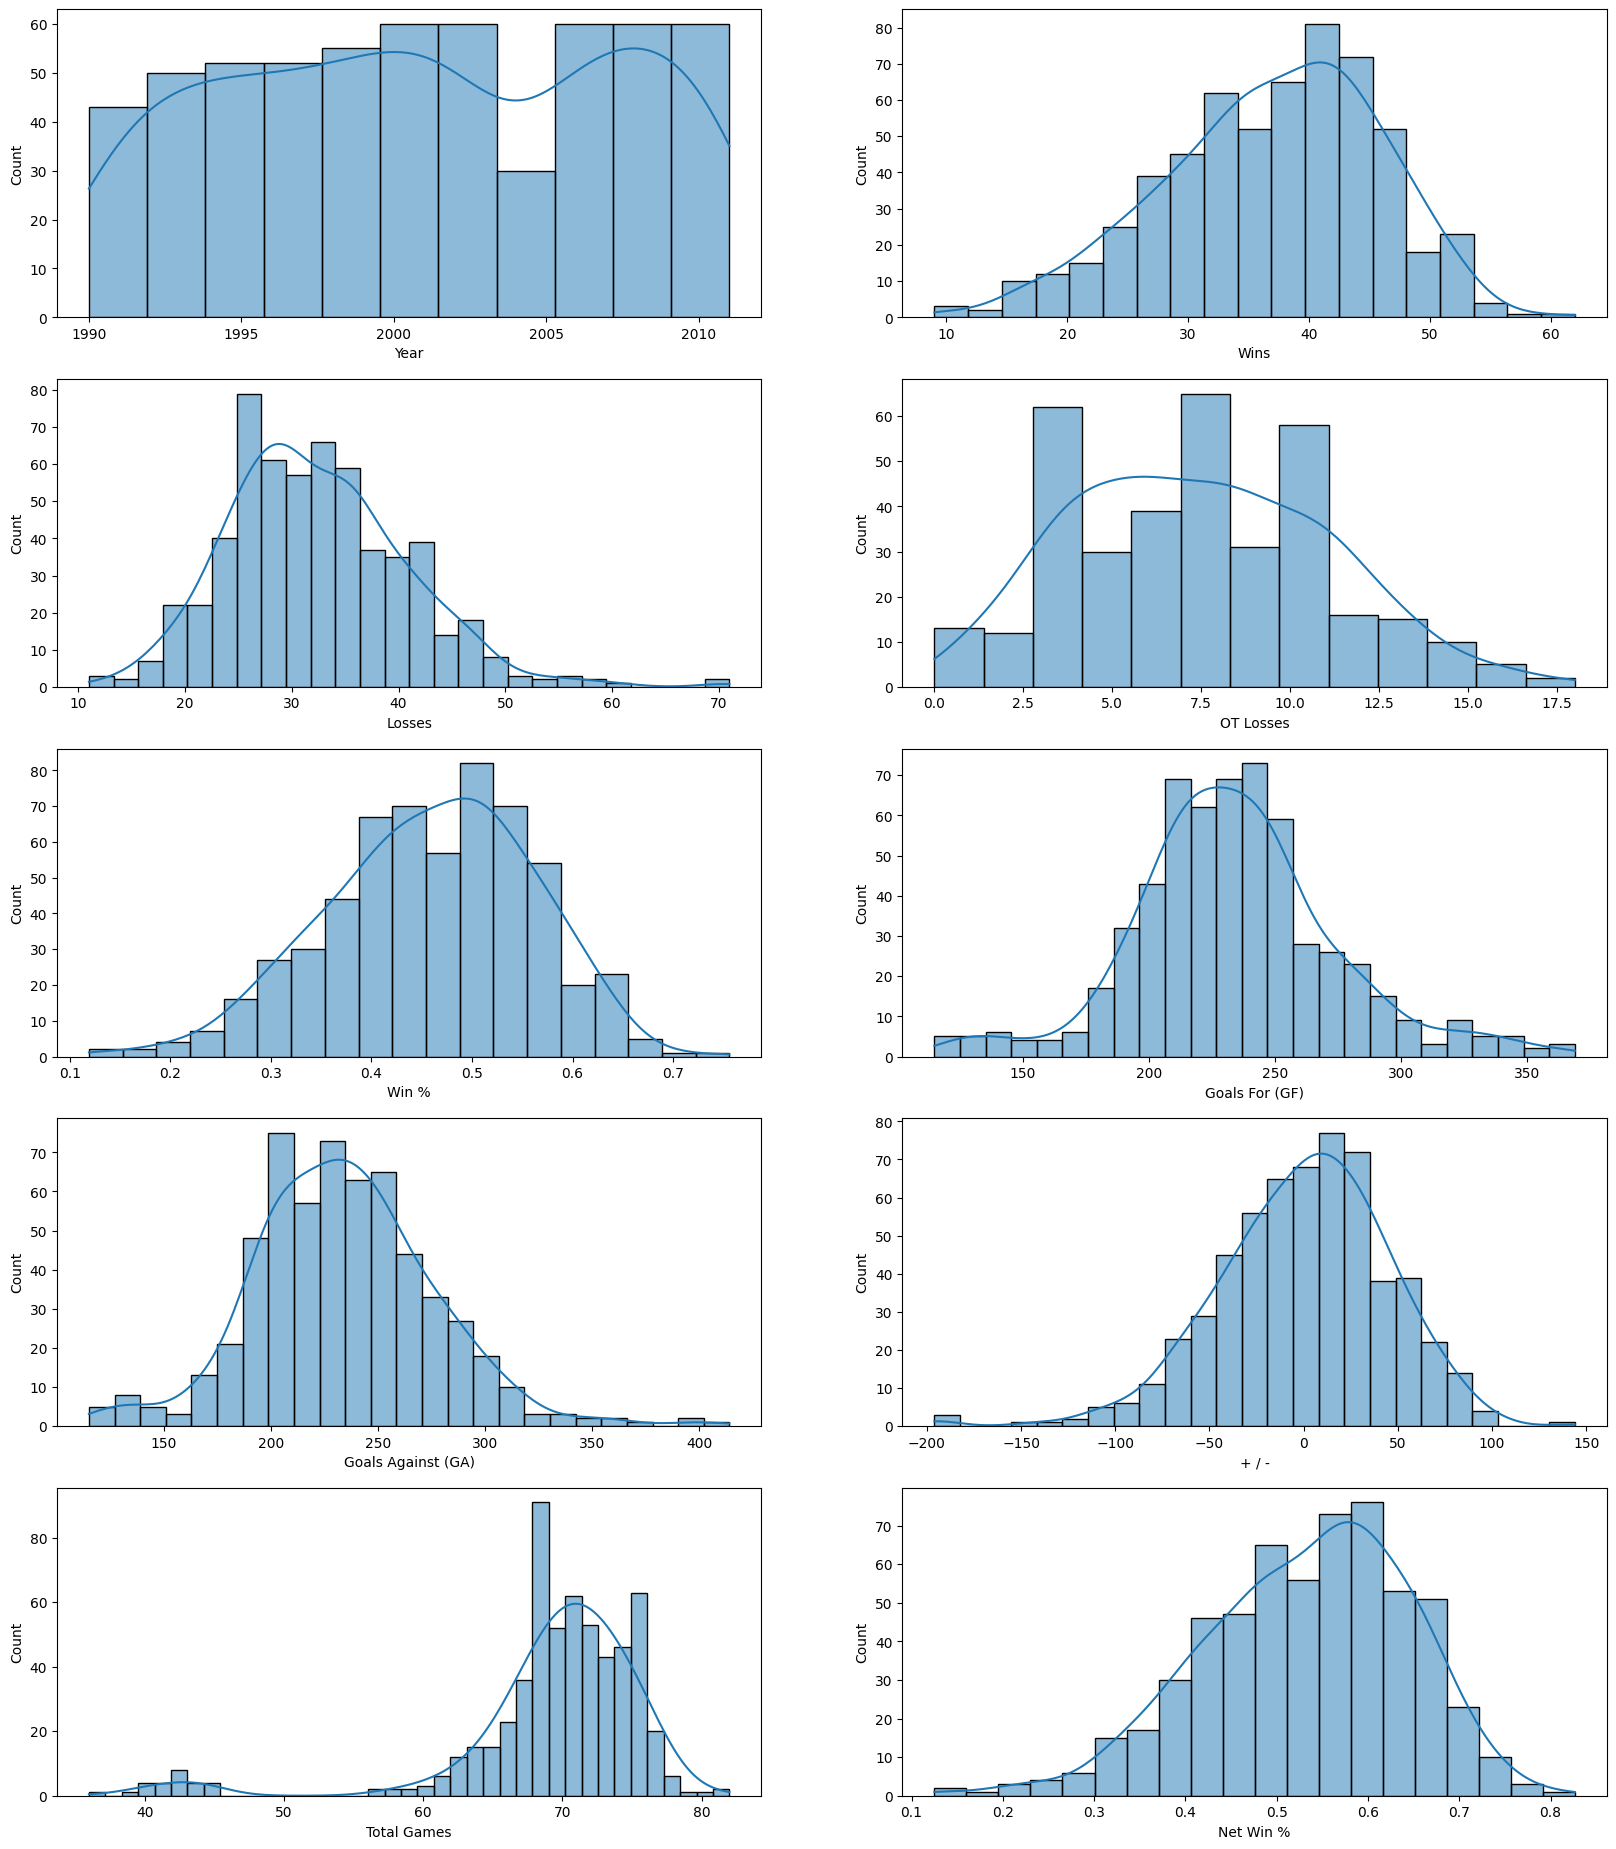

In [27]:
plt.figure(figsize=(20,28))
x= 1

for i in con:
    plt.subplot(6,2,x)
    x += 1
    sns.histplot(data=df,x=i, kde=True)
plt.show()

# Bivariate analyis

In [28]:
corr = df.corr(numeric_only=True)
corr

,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -,Total Games,Net Win %
Year,1.000000e+00,0.319328,-0.131710,0.663957,0.252317,-0.198979,-0.189797,7.092798e-16,0.246290,0.238570
Wins,3.193284e-01,1.000000,-0.668429,-0.018299,0.932683,0.615321,-0.289241,8.226265e-01,0.466950,0.912335
Losses,-1.317101e-01,-0.668429,1.000000,0.014863,-0.831878,-0.192856,0.740946,-8.683843e-01,0.345586,-0.903706
OT Losses,6.639567e-01,-0.018299,0.014863,1.000000,-0.018053,0.091381,0.295333,-1.529663e-01,-0.009653,-0.021952
Win %,2.523170e-01,0.932683,-0.831878,-0.018053,1.000000,0.480057,-0.487020,8.871824e-01,0.187693,0.969081
Goals For (GF),-1.989795e-01,0.615321,-0.192856,0.091381,0.480057,1.000000,0.406473,5.139300e-01,0.547033,0.446863
Goals Against (GA),-1.897969e-01,-0.289241,0.740946,0.295333,-0.487020,0.406473,1.000000,-5.748704e-01,0.515997,-0.553301
+ / -,7.092798e-16,0.822627,-0.868384,-0.152966,0.887182,0.513930,-0.574870,1.000000e+00,0.005438,0.919686
Total Games,2.462900e-01,0.466950,0.345586,-0.009653,0.187693,0.547033,0.515997,5.437527e-03,1.000000,0.076625
Net Win %,2.385705e-01,0.912335,-0.903706,-0.021952,0.969081,0.446863,-0.553301,9.196857e-01,0.076625,1.000000


Text(0.5, 1.0, 'Heatmap For the Correlation')

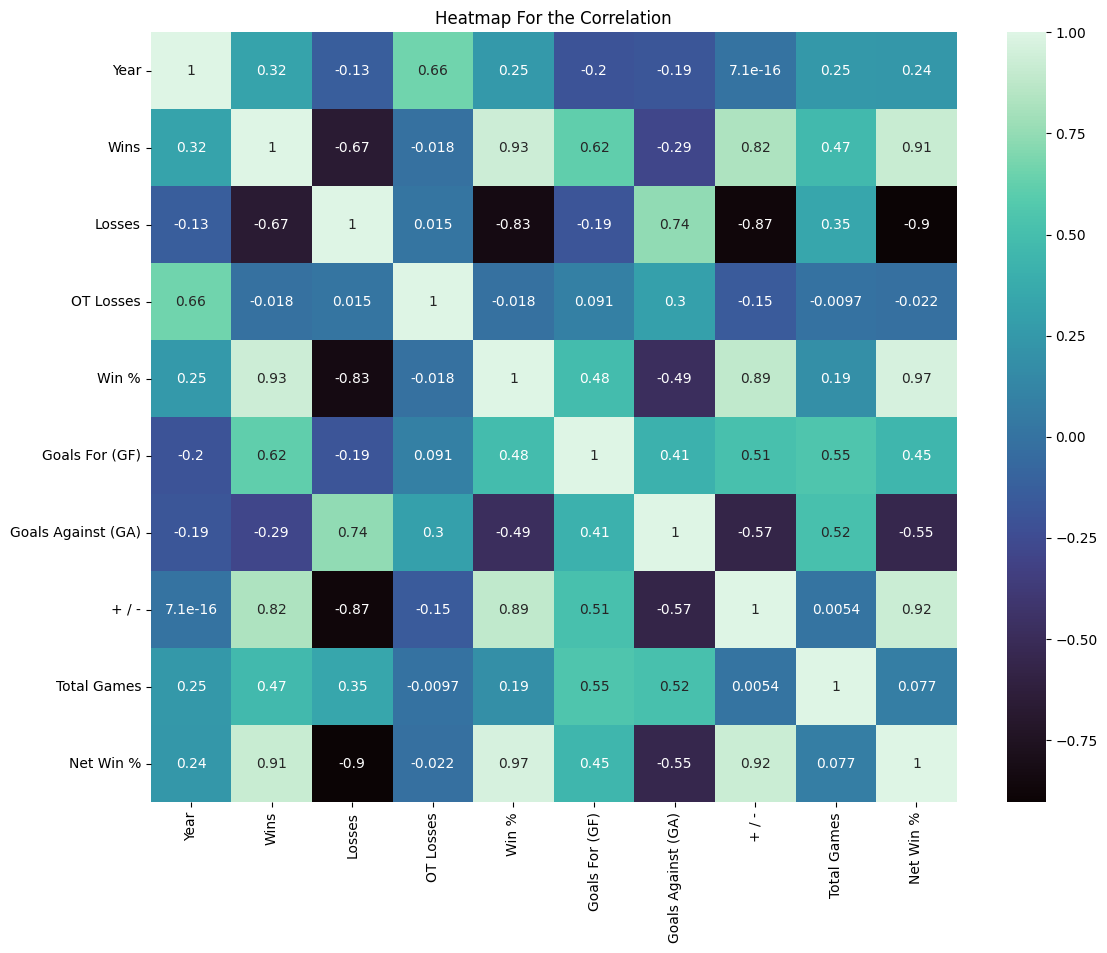

In [29]:
plt.figure(figsize=(13,10))
colormap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(data=corr,annot=True, cmap=colormap)
plt.title('Heatmap For the Correlation')

## Maltivariate analysis

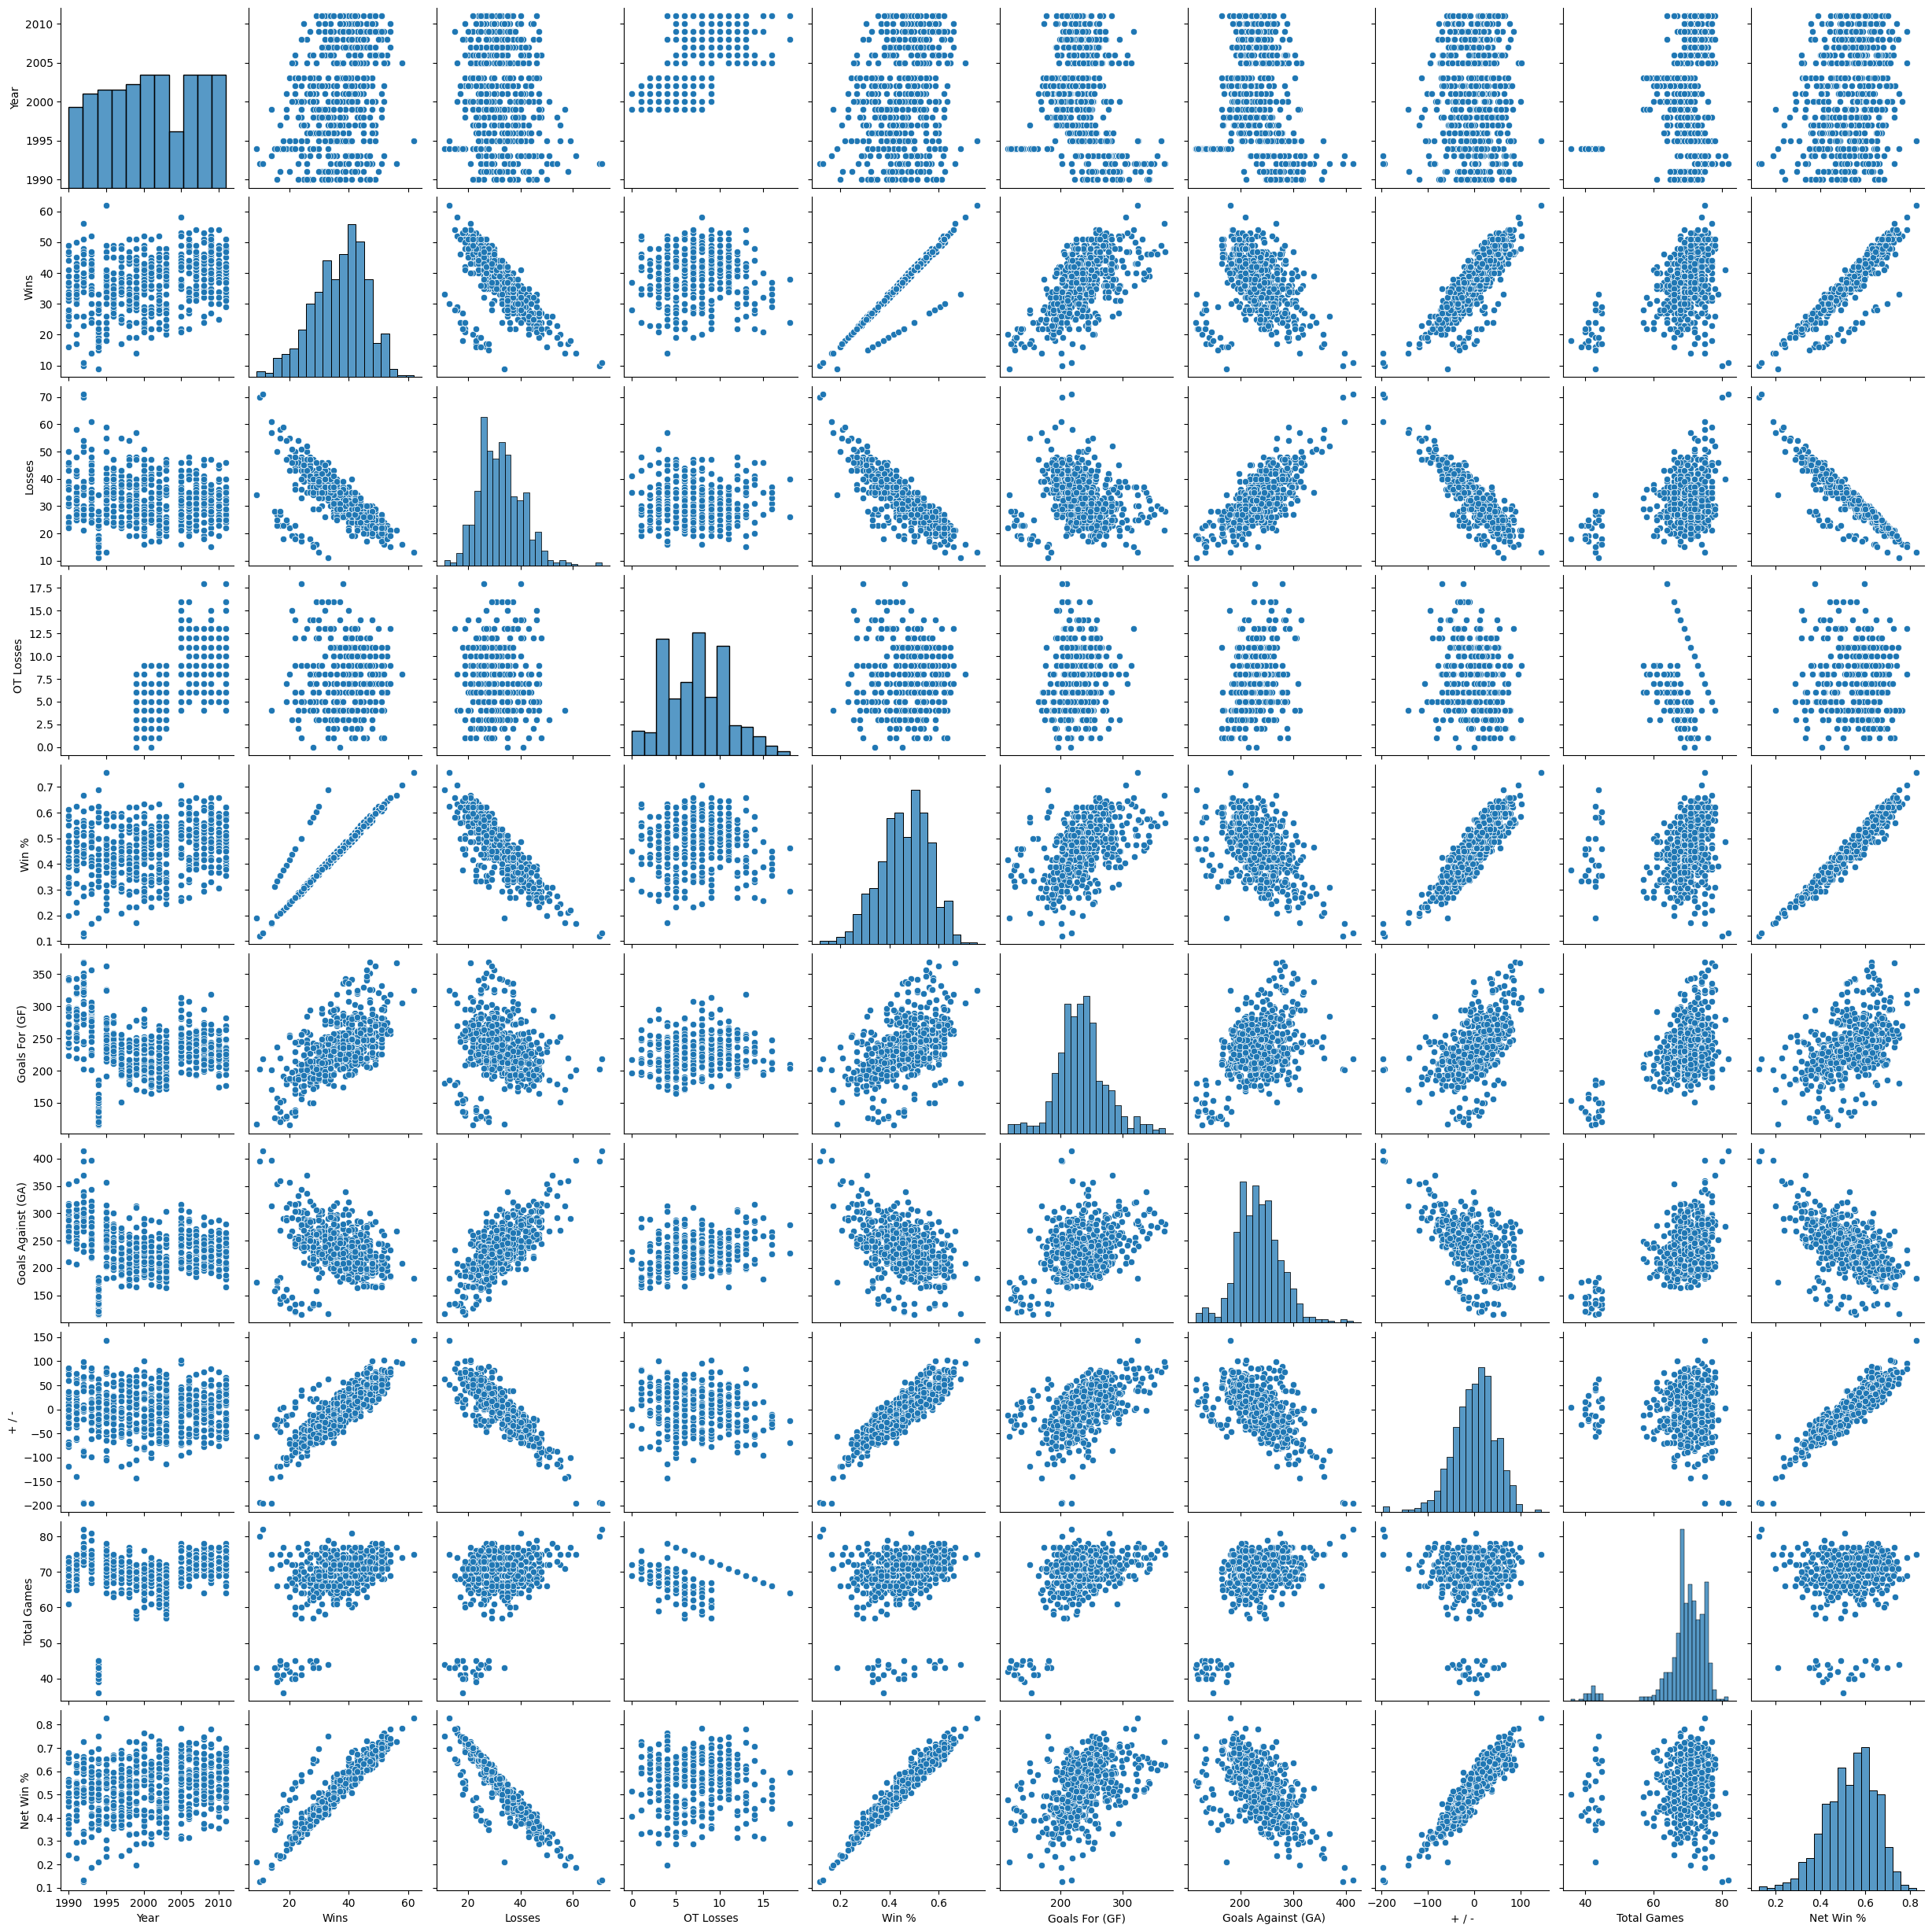

In [30]:
sns.pairplot(data=df)

## 6. *Perform Exploratory Data Analysis on the original Dataframe and provide some insights on the data*

In [32]:
df.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -,Total Games,Net Win %
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35,68,0.647059
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14,61,0.508197
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81,72,0.638889
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73,72,0.680556
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25,72,0.472222


## *Which year had the highest average number of goals scored (Goals for)?*

In [50]:
avg_no_goals = df.groupby('Year')['Goals For (GF)'].mean().reset_index()
avg_no_goals

,Year,Goals For (GF)
0,1990,276.428571
1,1991,278.318182
2,1992,304.625000
3,1993,272.346154
4,1994,143.346154
5,1995,257.730769
6,1996,239.076923
7,1997,216.307692
8,1998,215.925926
9,1999,225.214286


<Axes: xlabel='Year', ylabel='Goals For (GF)'>

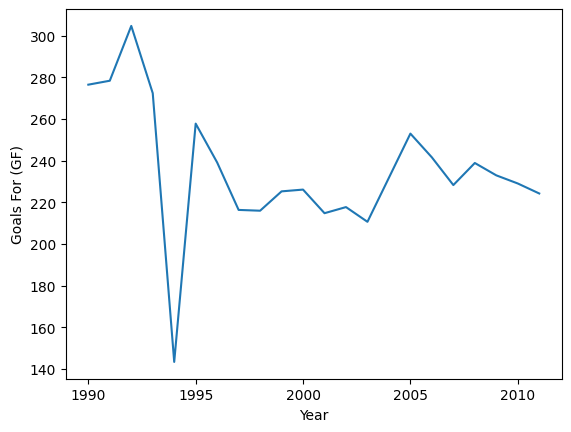

In [51]:
sns.lineplot(data=avg_no_goals, x='Year', y='Goals For (GF)')

### Answer : *Year 1990 had the highest average number of goals scored (Goals for)*

----

## *How has the win percentage changed over the years?*

In [55]:
win_change_over_years = df.groupby('Year')['Net Win %'].mean().reset_index()
win_change_over_years

,Year,Net Win %
0,1990,0.498802
1,1991,0.500622
2,1992,0.502818
3,1993,0.500758
4,1994,0.499323
5,1995,0.500320
6,1996,0.501149
7,1997,0.500269
8,1998,0.501705
9,1999,0.529648


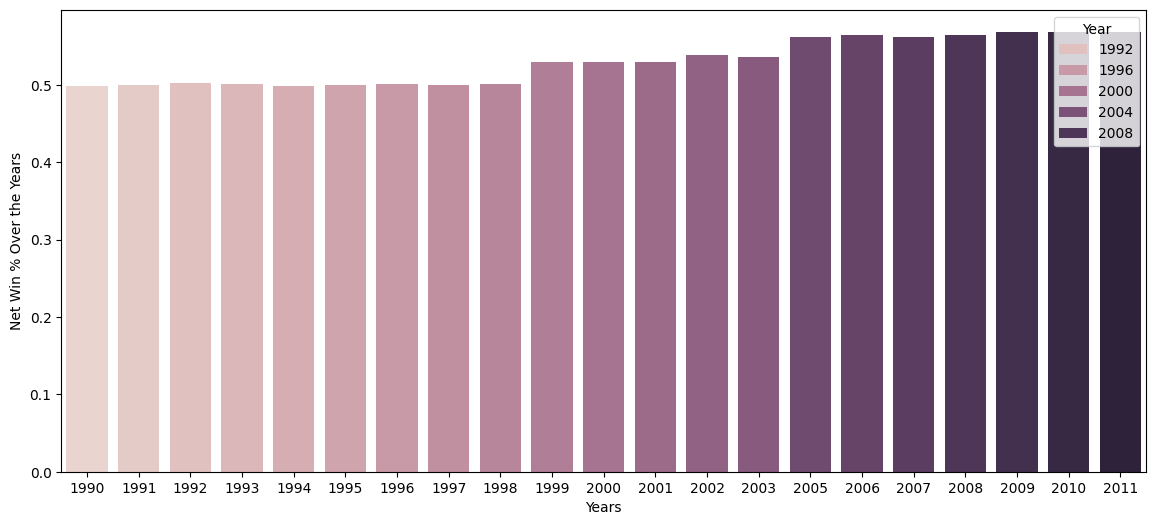

In [75]:
plt.figure(figsize=(14,6))
sns.barplot(data=win_change_over_years, x='Year',y='Net Win %',hue='Year')
plt.xlabel('Years')
plt.ylabel('Net Win % Over the Years')
plt.show()


### Answer : *Graph shows That Net Win % increased slowely over the Years*

--------

## *Which team has improved their win percentage the most over the years?*

In [67]:
team_improvement = df.groupby('Team Name')['Net Win %'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
team_improvement

,Team Name,Net Win %
0,Anaheim Ducks,-0.220168
1,Atlanta Thrashers,0.288531
2,Boston Bruins,-0.018854
3,Buffalo Sabres,0.041099
4,Calgary Flames,-0.078283
5,Carolina Hurricanes,0.054054
6,Chicago Blackhawks,-0.046753
7,Colorado Avalanche,-0.113304
8,Columbus Blue Jackets,-0.031244
9,Dallas Stars,-0.046095


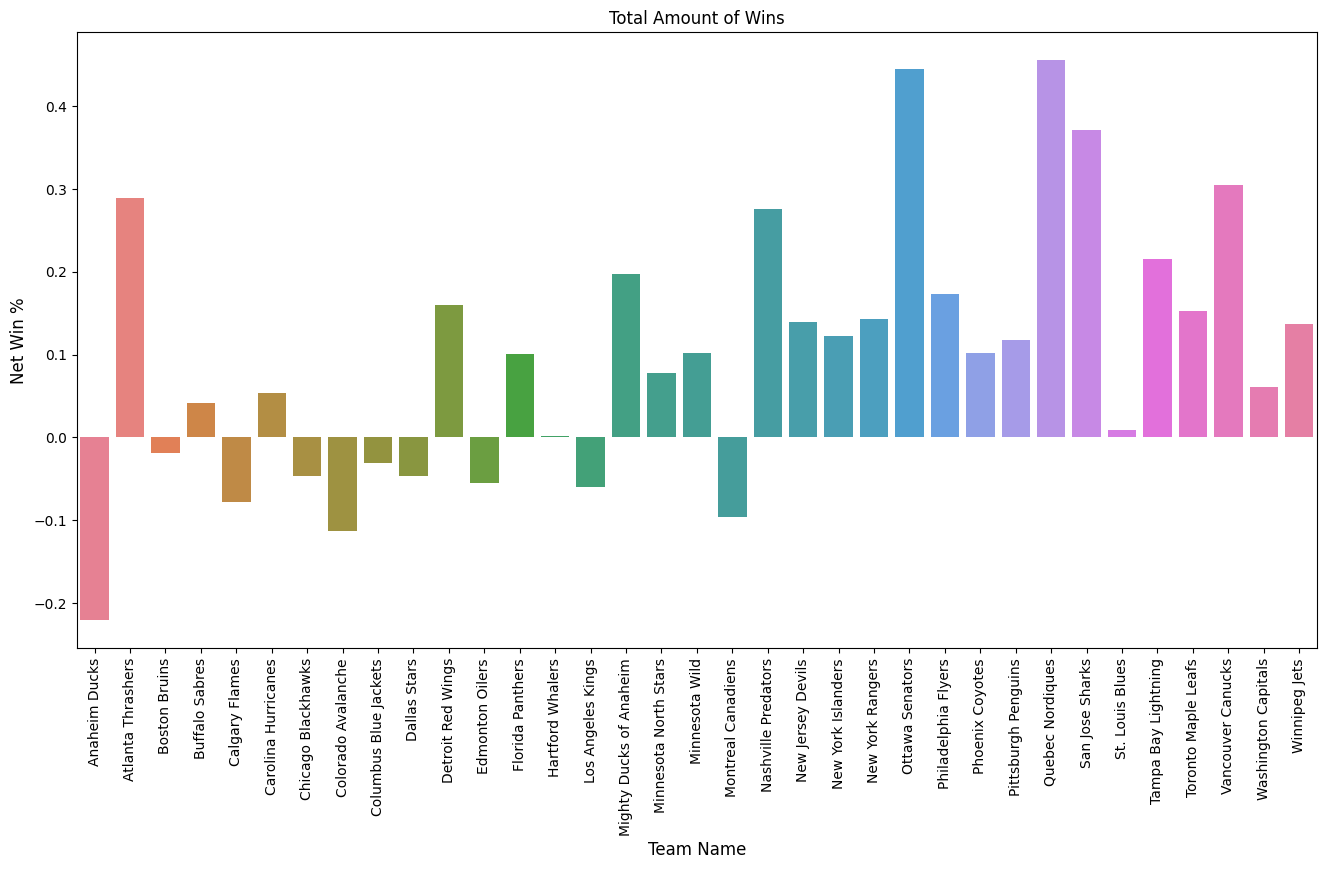

In [73]:
plt.figure(figsize=(16,8))
sns.barplot(data=team_improvement, x="Team Name", y='Net Win %',hue='Team Name')
plt.xticks(ticks=None,rotation=90)
plt.title('Total Amount of Wins')
plt.xlabel("Team Name",fontsize = 12)
plt.ylabel("Net Win %",fontsize = 12)
plt.show()

### Answer : *Team Anaheim Ducks improved their win percentage over the Years*

<h1 align= center>END</h1>

-------